<a href="https://colab.research.google.com/github/Alisoltan82/Customer_segmentation/blob/main/Customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Context
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

Data source https://www.kaggle.com/datasets/jackdaoud/marketing-data

### variables
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Session objectives

* To identify possible clusters from the available data using multiple models to find the most robust solution.
* confirm demographics validity that make the workable segments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('/content/ifood_df.csv')
df.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# 39 Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

<Axes: ylabel='Response'>

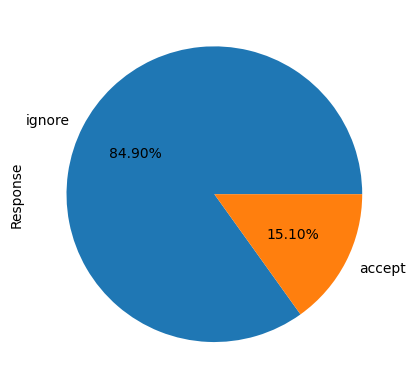

In [4]:
# Repflection of the current status in customer response%
df['Response'].value_counts().plot(kind = 'pie' , autopct = '%0.2f%%' , labels = ['ignore' , 'accept'])

In [5]:
customer_features = df[['Income', 'Kidhome', 'Teenhome', 'Age','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD' , 'Recency' ]]

product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']]

channel = df[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]

campaing_response = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','AcceptedCmpOverall']]

#grouping columns
education = df[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD']]
marital_status = df[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow']]

In [6]:
#grouping one hot encoded columns for better visualization and contrast
conditions = [
    (df['education_2n Cycle'] == 1),
    (df['education_Basic'] == 1),
    (df['education_Graduation'] == 1),
    (df['education_Master'] == 1),
    (df['education_PhD'] == 1)
]

ranks = [
    '2nd cycle',
    'basic',
    'grad',
    'master',
    'PhD'
]

df['education'] = np.select(conditions,choicelist=ranks)

In [7]:
conditions = [
    (df['marital_Divorced'] == 1),
    (df['marital_Widow']== 1),
    (df['marital_Single']== 1),
    (df['marital_Together'] == 1),
    (df['marital_Married'] == 1)
]

status = [
    'divorced',
    'widow',
    'single',
    'together',
    'married'
]

df['marital_status'] = np.select(conditions , status)

In [8]:
#drop the original columns
df.drop(marital_status, axis = 1 , inplace=True)
df.drop(education ,axis = 1, inplace = True)

In [9]:
#Transform Mnt_product to more meaningful figure as a percentage of Mnt_total
df['wine'] = df['MntWines'] / df['MntTotal']
df['fruits'] = df['MntFruits'] / df['MntTotal']
df['meat'] = df['MntMeatProducts'] / df['MntTotal']
df['fish'] = df['MntFishProducts'] / df['MntTotal']
df['sweet'] = df['MntSweetProducts'] / df['MntTotal']
df['gold'] = df['MntGoldProds'] / df['MntTotal']

df.drop(columns = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'

],axis = 1
 , inplace = True
 )

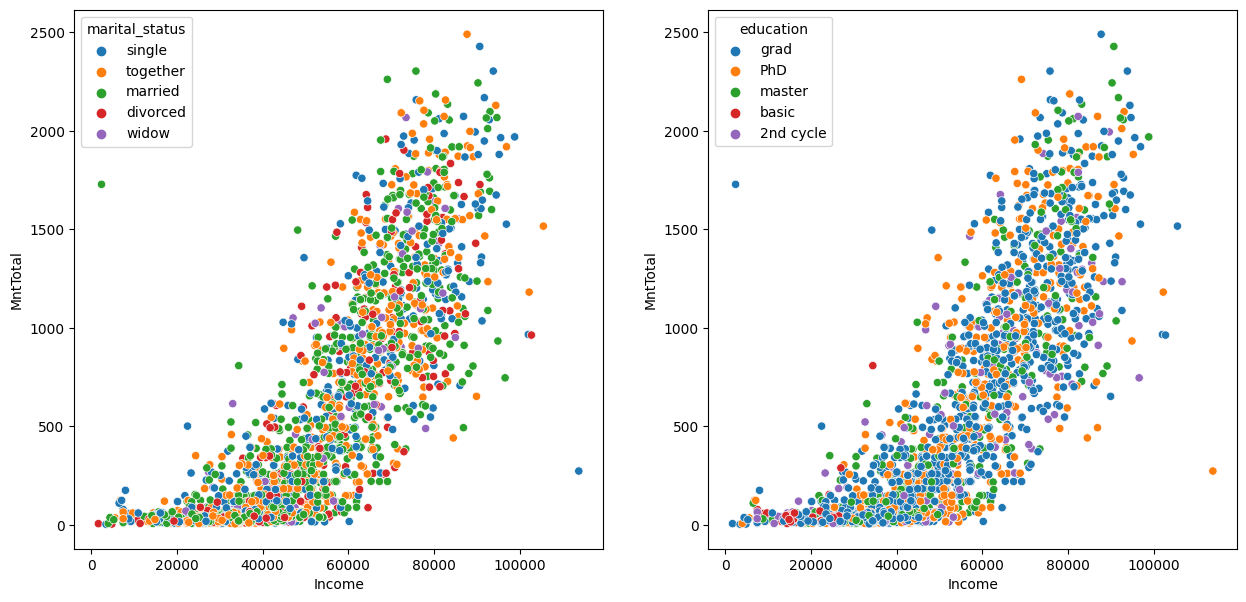

In [10]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))


sns.scatterplot(
    data=df,
    x= 'Income',
    y= 'MntTotal',
    hue = 'marital_status',
    ax = ax1
)

sns.scatterplot(
    data = df,
    x = 'Income',
    y = 'MntTotal',
    hue = 'education',
    ax = ax2
)

plt.show()

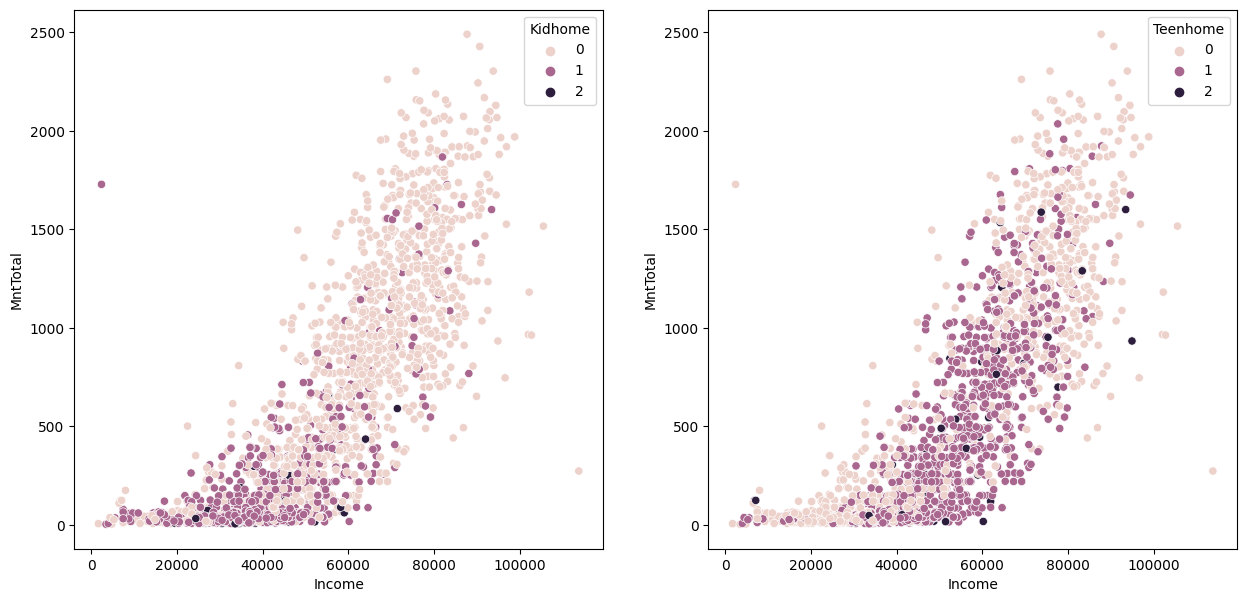

In [11]:
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))


sns.scatterplot(
    data=df,
    x= 'Income',
    y= 'MntTotal',
    hue = 'Kidhome',
    ax = ax1
)

sns.scatterplot(
    data = df,
    x = 'Income',
    y = 'MntTotal',
    hue = 'Teenhome',
    ax = ax2
)

plt.show()

Income is exponentially related to total purchases however, families tend to purchase less and the younger the kids the less their purchase which requires furthur research for family oriented experiences and offers across different channels and products

In [12]:
channel.describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,2.318367,4.100680,2.645351,5.823583
std,1.886107,2.737424,2.798647,3.241796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


In [13]:
import plotly.express as px

fig = plt.figure(figsize = (15,5))
px.box( df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']] )


<Figure size 1500x500 with 0 Axes>

<Axes: ylabel='MntTotal'>

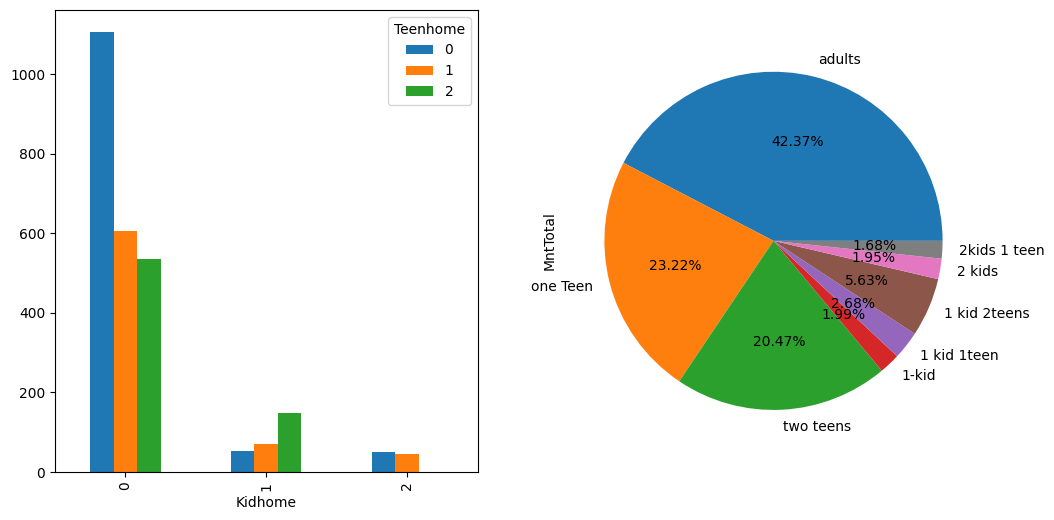

In [14]:
fig , (ax1 , ax2 )= plt.subplots(1,2,figsize = (12 , 6))
df.groupby(['Kidhome' , 'Teenhome'])['MntTotal'].median().unstack().plot(kind = 'bar' , ax = ax1 )
df.groupby(['Kidhome' , 'Teenhome'])['MntTotal'].median().plot(kind = 'pie' ,
                                                                autopct = '%0.2f%%' ,
                                                                  labels= ['adults' ,
                                                                         'one Teen' ,
                                                                         'two teens' ,
                                                                            '1-kid' ,
                                                                        '1 kid 1teen',
                                                                        '1 kid 2teens',
                                                                         '2 kids',
                                                                        '2kids 1 teen' ] ,ax = ax2)


In [15]:
#transforming product purchases to a percent of total purchases
df['NumTotalpurchases'] = df['NumWebPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']
df['web'] = df['NumWebPurchases'] / df['NumTotalpurchases']
df['deals'] = df['NumDealsPurchases'] / df['NumTotalpurchases']
df['store'] = df['NumStorePurchases'] / df['NumTotalpurchases']
df['catalog'] = df['NumCatalogPurchases'] / df['NumTotalpurchases']

df.drop(columns= [
    'NumWebPurchases',
    'NumDealsPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
],
axis = 1 , inplace = True)

to that point the most obvious customer features with significant variantion Kidhome , Teenhome
lets procees machine learning clustering to have a deeper look into underlying segments.

In [16]:
#saving a copy of the preprocessed dataframe
df.to_csv(path_or_buf= 'E:\myproject\my_dataframe.csv' , index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              2205 non-null   float64
 1   Kidhome             2205 non-null   int64  
 2   Teenhome            2205 non-null   int64  
 3   Recency             2205 non-null   int64  
 4   NumWebVisitsMonth   2205 non-null   int64  
 5   AcceptedCmp3        2205 non-null   int64  
 6   AcceptedCmp4        2205 non-null   int64  
 7   AcceptedCmp5        2205 non-null   int64  
 8   AcceptedCmp1        2205 non-null   int64  
 9   AcceptedCmp2        2205 non-null   int64  
 10  Complain            2205 non-null   int64  
 11  Z_CostContact       2205 non-null   int64  
 12  Z_Revenue           2205 non-null   int64  
 13  Response            2205 non-null   int64  
 14  Age                 2205 non-null   int64  
 15  Customer_Days       2205 non-null   int64  
 16  MntTot

In [18]:
df.dropna(inplace = True)

In [19]:
num_cols = df.select_dtypes(exclude= object)
num_cols

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,fruits,meat,fish,sweet,gold,NumTotalpurchases,web,deals,store,catalog
0,58138.0,0,0,58,7,0,0,0,0,0,...,0.057554,0.357096,0.112492,0.057554,0.057554,25,0.320000,0.120000,0.160000,0.400000
1,46344.0,1,1,38,5,0,0,0,0,0,...,0.047619,0.285714,0.095238,0.047619,0.285714,6,0.166667,0.333333,0.333333,0.166667
2,71613.0,0,0,26,4,0,0,0,0,0,...,0.066757,0.173025,0.151226,0.028610,0.057221,21,0.380952,0.047619,0.476190,0.095238
3,26646.0,1,0,26,6,0,0,0,0,0,...,0.083333,0.416667,0.208333,0.062500,0.104167,8,0.250000,0.250000,0.500000,0.000000
4,58293.0,1,0,94,5,0,0,0,0,0,...,0.105651,0.289926,0.113022,0.066339,0.036855,19,0.263158,0.263158,0.315789,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,5,0,0,0,0,0,...,0.039305,0.166362,0.038391,0.107861,0.225777,18,0.500000,0.111111,0.222222,0.166667
2201,64014.0,2,1,56,7,0,0,0,1,0,...,0.000000,0.068807,0.000000,0.000000,0.018349,22,0.363636,0.318182,0.227273,0.090909
2202,56981.0,0,0,91,6,0,1,0,0,0,...,0.039441,0.178307,0.026294,0.009860,0.019721,19,0.105263,0.052632,0.684211,0.157895
2203,69245.0,0,1,8,3,0,0,0,0,0,...,0.038363,0.273657,0.102302,0.038363,0.078005,23,0.260870,0.086957,0.434783,0.217391


In [20]:
num_cols.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'wine', 'fruits', 'meat', 'fish', 'sweet', 'gold',
       'NumTotalpurchases', 'web', 'deals', 'store', 'catalog'],
      dtype='object')

In [21]:
for i in num_cols.columns:
    print(f'{i} = ' , num_cols[i].var())

Income =  427374261.0444341
Kidhome =  0.28854262394233277
Teenhome =  0.2963855332275409
Recency =  837.4228879535502
NumWebVisitsMonth =  5.7622183934631295
AcceptedCmp3 =  0.06854660662138946
AcceptedCmp4 =  0.06893333052979113
AcceptedCmp5 =  0.06777192194773621
AcceptedCmp1 =  0.06033016656751199
AcceptedCmp2 =  0.013438449674150064
Complain =  0.009000195011096666
Z_CostContact =  0.0
Z_Revenue =  0.0
Response =  0.1283671881667431
Age =  137.135690617575
Customer_Days =  41011.15282273409
MntTotal =  331721.27323981875
MntRegularProds =  306784.0737360457
AcceptedCmpOverall =  0.4633377076837259
wine =  0.05660417250856614
fruits =  0.005281301261685282
meat =  0.017889911744654447
fish =  0.010094447628537916
sweet =  0.006071967713061321
gold =  0.064677812507864
NumTotalpurchases =  57.84360810932825
web =  0.00957652943206461
deals =  0.012278679483981517
store =  0.013774403344517221
catalog =  0.015660158227574675


In [22]:
#drop columns with low variance
df.drop(columns = ['Z_CostContact' ,'Z_Revenue' ,
                    'Response' , 'AcceptedCmp2' , 'AcceptedCmp1' ,
                      'AcceptedCmp5' , 'AcceptedCmp4' , 'AcceptedCmp3' , 'Complain' ] , axis = 1 , inplace = True)

In [23]:
#unique values per columns %
for i in df.columns:
    print(f'{i} = ' , df[i].nunique() / len(df[i])*100)

Income =  89.01497957330913
Kidhome =  0.13617793917385385
Teenhome =  0.13617793917385385
Recency =  4.5392646391284615
NumWebVisitsMonth =  0.6808896958692692
Age =  2.5419881979119383
Customer_Days =  30.049931911030413
MntTotal =  40.62641852019973
MntRegularProds =  44.21243758511121
AcceptedCmpOverall =  0.22696323195642307
education =  0.22696323195642307
marital_status =  0.22696323195642307
wine =  76.03268270540173
fruits =  55.87834770767136
meat =  70.72174307762143
fish =  55.19745801180209
sweet =  55.56059918293237
gold =  70.7671357240127
NumTotalpurchases =  1.6341352700862462
web =  6.082614616432138
deals =  5.719473445301861
store =  6.400363141171131
catalog =  6.445755787562415


In [24]:
Numerical_features = df.loc[:,(df.nunique() > 5)].columns.to_list()
categorical_coded_features = df.loc[:,(df.nunique() <=5) & (df.dtypes != 'object')].columns.to_list()
categorical_object_features = df.select_dtypes(include = 'object').columns.to_list()

df.shape[1] , len(Numerical_features) , len(categorical_coded_features) , len(categorical_object_features)

(23, 18, 3, 2)

<Axes: >

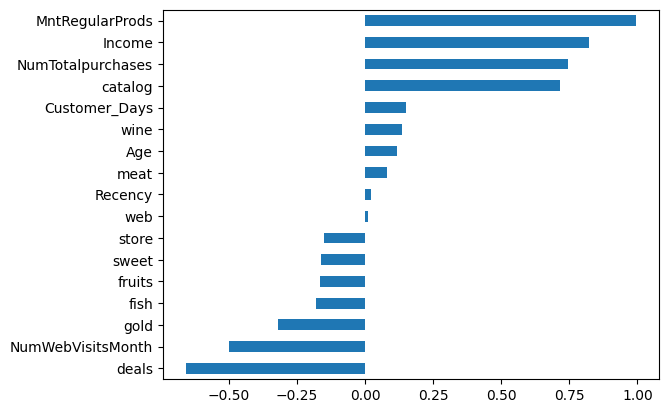

In [25]:
df[Numerical_features].drop(['MntTotal'], axis = 1).corrwith(df['MntTotal']).sort_values().plot(kind = 'barh')

### Top +ve correlated variables with MntTotal:
* MntRegularProds
* Income
* NumTotalPurchases
* catalog


### Top -ve correlated variables with MntTotal:
* Deals ??
* NumWebVisitsMonth ??
* gold
* fish





* kindhome is the variable to consider as AcceptedCmpOverall is a customer response (not a customer feature) that is necessarly correlated with MntTotal as a performance proxy offocus for segmentation

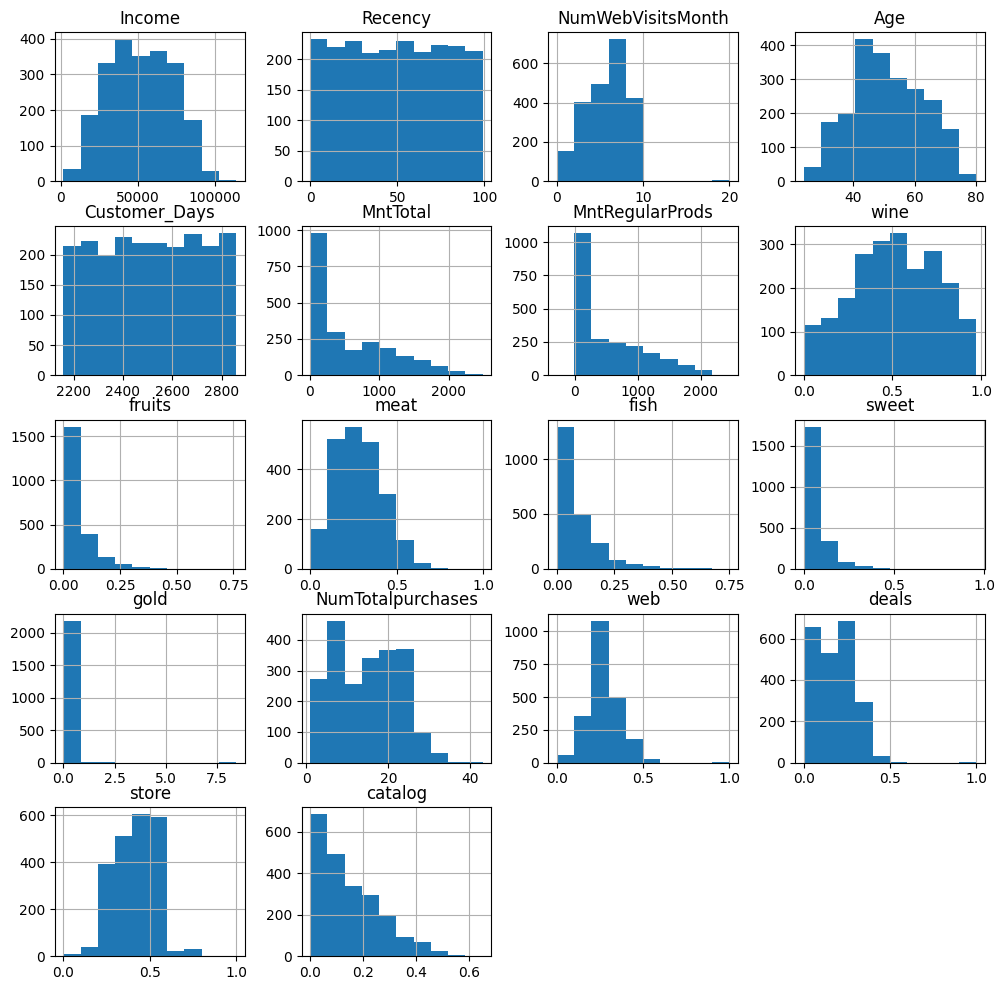

In [26]:
#distribution of continueos variables

df[Numerical_features].hist( figsize = (12,12))
plt.show()

In [27]:
df

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,...,fruits,meat,fish,sweet,gold,NumTotalpurchases,web,deals,store,catalog
0,58138.0,0,0,58,7,63,2822,1529,1441,0,...,0.057554,0.357096,0.112492,0.057554,0.057554,25,0.320000,0.120000,0.160000,0.400000
1,46344.0,1,1,38,5,66,2272,21,15,0,...,0.047619,0.285714,0.095238,0.047619,0.285714,6,0.166667,0.333333,0.333333,0.166667
2,71613.0,0,0,26,4,55,2471,734,692,0,...,0.066757,0.173025,0.151226,0.028610,0.057221,21,0.380952,0.047619,0.476190,0.095238
3,26646.0,1,0,26,6,36,2298,48,43,0,...,0.083333,0.416667,0.208333,0.062500,0.104167,8,0.250000,0.250000,0.500000,0.000000
4,58293.0,1,0,94,5,39,2320,407,392,0,...,0.105651,0.289926,0.113022,0.066339,0.036855,19,0.263158,0.263158,0.315789,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,5,53,2540,1094,847,0,...,0.039305,0.166362,0.038391,0.107861,0.225777,18,0.500000,0.111111,0.222222,0.166667
2201,64014.0,2,1,56,7,74,2178,436,428,1,...,0.000000,0.068807,0.000000,0.000000,0.018349,22,0.363636,0.318182,0.227273,0.090909
2202,56981.0,0,0,91,6,39,2314,1217,1193,1,...,0.039441,0.178307,0.026294,0.009860,0.019721,19,0.105263,0.052632,0.684211,0.157895
2203,69245.0,0,1,8,3,64,2315,782,721,0,...,0.038363,0.273657,0.102302,0.038363,0.078005,23,0.260870,0.086957,0.434783,0.217391


In [28]:
preprocessing_columns = df.loc[: , (df.nunique() > 3) & (df.dtypes != 'object')]
preprocessing_columns

,Income,Recency,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,wine,fruits,meat,fish,sweet,gold,NumTotalpurchases,web,deals,store,catalog
0,58138.0,58,7,63,2822,1529,1441,0,0.415304,0.057554,0.357096,0.112492,0.057554,0.057554,25,0.320000,0.120000,0.160000,0.400000
1,46344.0,38,5,66,2272,21,15,0,0.523810,0.047619,0.285714,0.095238,0.047619,0.285714,6,0.166667,0.333333,0.333333,0.166667
2,71613.0,26,4,55,2471,734,692,0,0.580381,0.066757,0.173025,0.151226,0.028610,0.057221,21,0.380952,0.047619,0.476190,0.095238
3,26646.0,26,6,36,2298,48,43,0,0.229167,0.083333,0.416667,0.208333,0.062500,0.104167,8,0.250000,0.250000,0.500000,0.000000
4,58293.0,94,5,39,2320,407,392,0,0.425061,0.105651,0.289926,0.113022,0.066339,0.036855,19,0.263158,0.263158,0.315789,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,46,5,53,2540,1094,847,0,0.648080,0.039305,0.166362,0.038391,0.107861,0.225777,18,0.500000,0.111111,0.222222,0.166667
2201,64014.0,56,7,74,2178,436,428,1,0.931193,0.000000,0.068807,0.000000,0.000000,0.018349,22,0.363636,0.318182,0.227273,0.090909
2202,56981.0,91,6,39,2314,1217,1193,1,0.746097,0.039441,0.178307,0.026294,0.009860,0.019721,19,0.105263,0.052632,0.684211,0.157895
2203,69245.0,8,3,64,2315,782,721,0,0.547315,0.038363,0.273657,0.102302,0.038363,0.078005,23,0.260870,0.086957,0.434783,0.217391


In [29]:
! pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.6 MB/s eta 0:00:00


In [30]:
from sklearn.preprocessing import KBinsDiscretizer ,StandardScaler , PowerTransformer , power_transform
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , StandardScaler , RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif , mutual_info_regression , SelectKBest
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans , MiniBatchKMeans , MeanShift , kmeans_plusplus , AgglomerativeClustering

In [31]:
preprocessor = ColumnTransformer(
    transformers = [
        ('scale' , RobustScaler(with_scaling=True) , preprocessing_columns.columns),
        ('ordinal' , OrdinalEncoder() , df.select_dtypes('object').columns)
    ] , remainder = 'passthrough'
)

In [32]:
data = preprocessor.fit_transform(df)
df_2 = pd.DataFrame(data = data,
                    columns = df.columns)
df_2

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,...,fruits,meat,fish,sweet,gold,NumTotalpurchases,web,deals,store,catalog
0,0.206273,0.18,0.25,0.722222,0.879656,1.306167,1.367734,0.0,-0.276908,0.327439,...,-0.219061,0.769231,0.443478,-0.269630,-1.510588,1.260000,3.0,2.0,0.0,0.0
1,-0.150283,-0.22,-0.25,0.888889,-0.696275,-0.354626,-0.323843,0.0,0.017842,0.184959,...,1.161780,-0.692308,-0.706522,0.962963,-0.470588,0.210000,3.0,2.0,1.0,1.0
2,0.613650,-0.46,-0.50,0.277778,-0.126074,0.430617,0.479241,0.0,0.171517,0.459431,...,-0.221078,0.461538,0.900621,-0.687831,0.386555,-0.111429,3.0,3.0,0.0,0.0
3,-0.745794,-0.46,0.00,-0.777778,-0.621777,-0.324890,-0.290629,0.0,-0.782542,0.697151,...,0.063042,-0.538462,-0.081522,0.481481,0.529412,-0.540000,3.0,3.0,1.0,0.0
4,0.210959,0.90,-0.25,-0.611111,-0.558739,0.070485,0.123369,0.0,-0.250403,1.017219,...,-0.344332,0.307692,0.017162,0.557505,-0.575851,0.170526,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0.299539,-0.06,-0.25,0.166667,0.071633,0.827093,0.663108,0.0,0.355418,0.065728,...,0.799036,0.230769,1.793478,-0.320988,-1.137255,0.210000,3.0,1.0,0.0,1.0
2199,0.383917,0.14,0.25,1.333333,-0.965616,0.102423,0.166074,1.0,1.124480,-0.497965,...,-0.456334,0.538462,0.770751,0.875421,-1.106952,-0.130909,1.0,3.0,2.0,1.0
2200,0.171295,0.84,0.00,-0.611111,-0.575931,0.962555,1.073547,1.0,0.621676,0.067677,...,-0.448031,0.307692,-1.167048,-0.658869,1.634675,0.170526,3.0,0.0,0.0,0.0
2201,0.542060,-0.82,-0.75,0.777778,-0.573066,0.483480,0.513642,0.0,0.081692,0.052216,...,-0.095289,0.615385,0.000000,-0.460548,0.138107,0.438261,4.0,3.0,0.0,1.0


In [33]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2203.0,0.010586,0.624988,-1.499055,-0.486554,0.0,0.513446,1.887053
Kidhome,2203.0,0.000381,0.578765,-0.980000,-0.500000,0.0,0.500000,1.000000
Teenhome,2203.0,-0.167726,0.600116,-1.500000,-0.750000,0.0,0.250000,3.500000
Recency,2203.0,0.060877,0.650583,-1.444444,-0.388889,0.0,0.611111,1.666667
NumWebVisitsMonth,2203.0,-0.006201,0.580264,-1.020057,-0.504298,0.0,0.495702,0.982808
Age,2203.0,0.242590,0.634309,-0.371145,-0.316079,0.0,0.683921,2.365639
Customer_Days,2203.0,0.274229,0.657035,-0.677343,-0.291815,0.0,0.708185,2.574140
MntTotal,2203.0,0.299591,0.680689,0.000000,0.000000,0.0,0.000000,4.000000
MntRegularProds,2203.0,-0.016057,0.646289,-1.405062,-0.494731,0.0,0.505269,1.235934
AcceptedCmpOverall,2203.0,0.352650,1.042226,-0.497965,-0.362545,0.0,0.637455,10.440390


In [34]:
n = df_2.shape[1]
pca = PCA(n_components= n , random_state=42)
df_pca = pd.DataFrame(
    pca.fit_transform(df_2)
)

In [35]:
exp_var = pca.explained_variance_ratio_
exp_var.cumsum()

array([0.23734674, 0.35710284, 0.46401868, 0.56600233, 0.64213545,
       0.69880889, 0.74526925, 0.78897265, 0.82877045, 0.85913307,
       0.88875372, 0.91313401, 0.93527376, 0.95467609, 0.9674916 ,
       0.97807537, 0.98639095, 0.99197201, 0.99705639, 0.99993295,
       1.        , 1.        , 1.        ])

In [36]:
pc_comp = ['pc1' , 'pc2' , 'pc3'  ]
data_pca = pd.DataFrame(np.round(pca.components_[:3,:] , 2),
                        index = pc_comp,
                        columns = df_2.columns)

clust_df = data_pca.T

In [37]:
data_pca.T.style.background_gradient()

,pc1,pc2,pc3
Income,-0.240000,-0.190000,0.170000
Kidhome,-0.010000,-0.010000,-0.000000
Teenhome,0.110000,0.230000,-0.130000
Recency,-0.100000,0.070000,0.040000
NumWebVisitsMonth,-0.000000,-0.010000,0.030000
Age,-0.220000,-0.240000,0.200000
Customer_Days,-0.230000,-0.250000,0.200000
MntTotal,-0.110000,-0.100000,0.160000
MntRegularProds,-0.200000,0.300000,0.010000
AcceptedCmpOverall,0.300000,-0.380000,-0.060000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

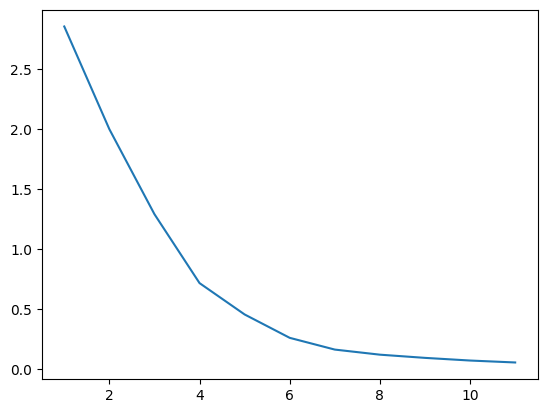

In [38]:

#elbow method to find best k value
wcss = []
for i in range(1,12):
    Model_1 = KMeans(n_clusters= i , max_iter= 300 , init='k-means++')
    Model_1.fit(clust_df)
    wcss.append(Model_1.inertia_)

plt.plot(range(1,12) , wcss)
plt.show()

In [39]:
Model_1 = KMeans(n_clusters= 5  , init='k-means++')
Model_1.fit_predict(clust_df)
k_labels = Model_1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [40]:
from sklearn.metrics import silhouette_score, rand_score , mutual_info_score , calinski_harabasz_score , davies_bouldin_score
score = silhouette_score(X = clust_df,labels = k_labels)
score

0.46770544722730717

** low score as a result of pushing all features to the model, however from a business view point the target parameter for the process is obvious "MntTotal" and in a practical sense we should be able to predict the parameters from demographics of the customer first then the interaction of purchasing behaviour.

Hereby, there is a construction of features that could be introduced to the model for better results.

## Top features extraction with correlation with MntTotal as a performance proxy

In [41]:
#Confirming correlation defined
y = df['MntTotal']
X = df[Numerical_features].drop(['MntTotal'], axis = 1)

Numerical inputs

<Axes: >

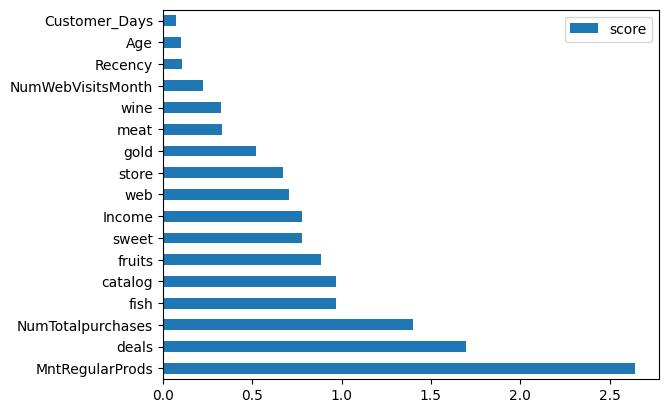

In [42]:
#Numerical_correlation

#power transformation for skewed variables
power = PowerTransformer(standardize=True)
num_pipe = Pipeline(
    steps = [
        ('scaler', RobustScaler()),
        ('power', power),
        ('selector', SelectKBest(mutual_info_regression , k = 'all'))
    ]
)

num_pipe.fit(X ,y[X.index] )
new_x = num_pipe.transform(X)
scores = num_pipe['selector'].scores_
Num_scores_df = pd.DataFrame(scores,
                         index = num_pipe.get_feature_names_out(),
                         columns = ['score'])
Num_scores_df.sort_values(ascending=False, by = 'score').plot(kind = 'barh')

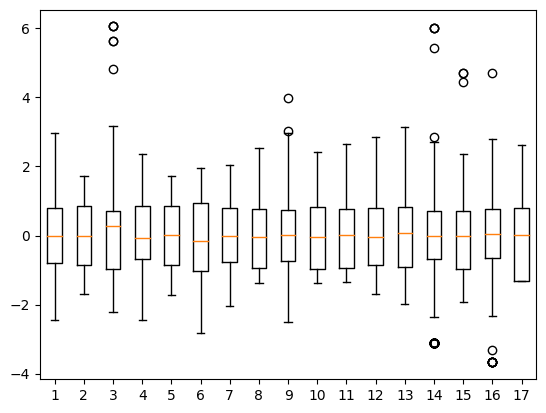

In [43]:
plt.boxplot(new_x)
plt.show()

In [44]:
top_num_inputs = Num_scores_df.nlargest(3 , columns = ['score'])
top_num_inputs

,score
MntRegularProds,2.644721
deals,1.699252
NumTotalpurchases,1.400377


Categorical variables

In [45]:
#visualization of categories
import plotly.express as px

customer_demographics = df[['Age', "Income","education" , 'Kidhome', 'Teenhome']]
fig = px.sunburst(
    customer_demographics,
    path = ['education', 'Kidhome' , 'Teenhome'],
    branchvalues= 'remainder',
    color = 'Income'
)
fig.update_traces(textinfo = 'label+percent parent')
fig.show()

In [46]:
#encode object columns
encoder = OrdinalEncoder().set_output(transform='pandas')
df[categorical_object_features] = encoder.fit_transform(df[categorical_object_features])

<Axes: >

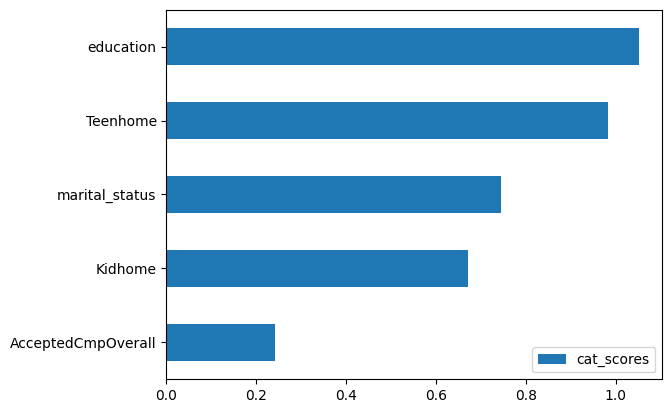

In [47]:
Categorical_inputs = categorical_coded_features + categorical_object_features
X = df[Categorical_inputs]
y = df['MntTotal']

#categorical_object_transformer
cat_selector = SelectKBest(mutual_info_classif , k = 'all')

cat_pipe = Pipeline(
    steps = [
    ('select', cat_selector)

]

)

cat_pipe.fit(X,y)
cat_x = cat_pipe.transform(X)
scores = cat_pipe['select'].scores_
cat_score_df = pd.DataFrame(scores,
                            index = cat_pipe.get_feature_names_out(),
                            columns = ['cat_scores'])
cat_score_df.sort_values(by = ['cat_scores']).plot(kind = 'barh')

In [48]:
top_cat_inputs = cat_score_df.nlargest(3 , columns = ['cat_scores'])
top_cat_inputs

,cat_scores
education,1.051604
Teenhome,0.982792
marital_status,0.745154


Top variables dataframe

In [49]:
top_cat_inputs.columns

Index(['cat_scores'], dtype='object')

In [50]:
selected_columns = top_cat_inputs.index.to_list() + top_num_inputs.index.to_list() + ['MntTotal']

selected_df = df[selected_columns]
selected_df

,education,Teenhome,marital_status,MntRegularProds,deals,NumTotalpurchases,MntTotal
0,3.0,0,2.0,1441,0.120000,25,1529
1,3.0,1,2.0,15,0.333333,6,21
2,3.0,0,3.0,692,0.047619,21,734
3,3.0,0,3.0,43,0.250000,8,48
4,1.0,0,1.0,392,0.263158,19,407
...,...,...,...,...,...,...,...
2200,3.0,1,1.0,847,0.111111,18,1094
2201,1.0,1,3.0,428,0.318182,22,436
2202,3.0,0,0.0,1193,0.052632,19,1217
2203,4.0,1,3.0,721,0.086957,23,782


In [52]:
#scale the selected_df
cols = ['NumTotalpurchases' , 'MntTotal']
scaler = RobustScaler(with_scaling=True)

transformer = ColumnTransformer([
    ('scale1' , scaler ,  cols)
],
remainder = 'passthrough')



clustering_df = pd.DataFrame(data = transformer.fit_transform(selected_df),
                                        columns= selected_df.columns)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

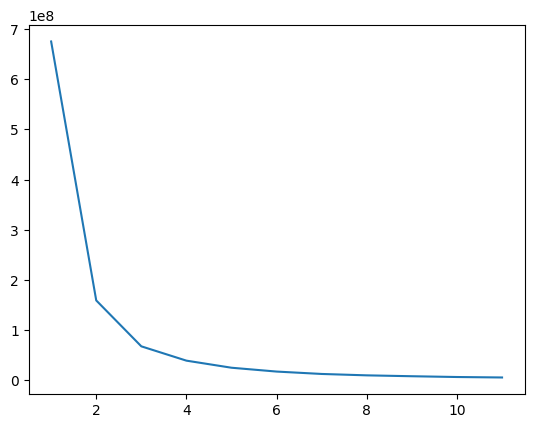

In [53]:
from sklearn.cluster import KMeans , MiniBatchKMeans , MeanShift , kmeans_plusplus , AgglomerativeClustering

#elbow method to find best k value
wcss = []
for i in range(1,12):
    Model_1 = KMeans(n_clusters= i , max_iter= 300 , init='k-means++')
    Model_1.fit(clustering_df)
    wcss.append(Model_1.inertia_)

plt.plot(range(1,12) , wcss)
plt.show()

In [54]:
Model_1 = KMeans(n_clusters= 3  , init='k-means++')
Model_1.fit_predict(clustering_df)
k_labels = Model_1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [55]:
from sklearn.metrics import silhouette_score, rand_score , mutual_info_score , calinski_harabasz_score , davies_bouldin_score
score = silhouette_score(X = clustering_df,labels = k_labels)
score

0.6808973454962596

In [56]:
#score function

def evaluate_model(X, labels):


    multiscores = {
        'silhouette_score' : silhouette_score(X,labels),
        'calinski_harabasz_score': calinski_harabasz_score(X,labels),
        'davies_bouldin_score': davies_bouldin_score(X,labels)
    }

    return multiscores

In [57]:
#clusters table view
df['k_labels'] = k_labels
df.groupby(['k_labels']).mean()


,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,...,fruits,meat,fish,sweet,gold,NumTotalpurchases,web,deals,store,catalog
k_labels,,,,,,,,,,,,,,,,,,,,,
0,66758.104452,0.116438,0.611301,48.529110,4.270548,54.270548,2521.583904,881.279110,809.582192,0.313356,...,0.051686,0.264514,0.072694,0.052934,0.080717,21.907534,0.276734,0.113681,0.402596,0.206990
1,38050.074161,0.692428,0.534738,48.705699,6.309133,49.577674,2494.244340,142.829040,117.448868,0.109290,...,0.067889,0.280062,0.099218,0.069854,0.229781,9.944575,0.266837,0.240699,0.419194,0.073271
2,77187.804734,0.056213,0.221893,51.053254,3.443787,51.363905,2568.180473,1607.266272,1539.926036,0.997041,...,0.039981,0.323474,0.056827,0.041867,0.042142,21.582840,0.254844,0.068402,0.388582,0.288173


At first glance the 3 clusters are distinctive almost in all aspects especially the demographics that helps with new customers and future campaign targeting beyon current consumer base

<ipython-input-58-0d389caf5d42>:1: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



<Axes: xlabel='Income', ylabel='MntTotal'>

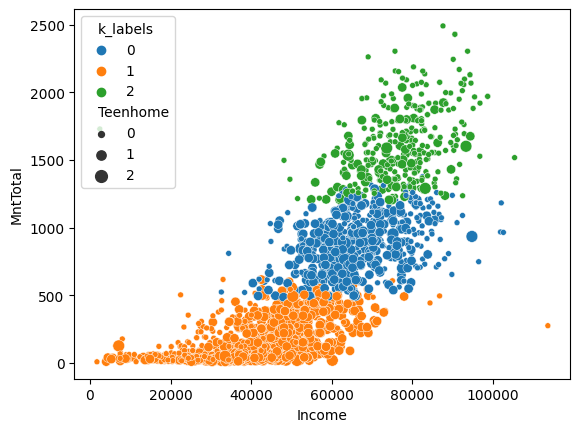

In [58]:
sns.scatterplot(
    data = df,
    x = 'Income',
    y = 'MntTotal',
    hue = 'k_labels',
    size = 'Teenhome',
    palette= sns.color_palette('tab10')
)

In [ ]:
px.scatter_3d(
    data_frame= df,
    x = 'Income' ,
    y = 'MntTotal',
    z = 'Age',
    color = 'k_labels'
)

## Agglomerativeclustering

In [59]:
#Model_2
scores = {}
for i in range(2,6):
    Model_2 = AgglomerativeClustering(n_clusters=i )
    Model_2.fit_predict(clustering_df)
    score = silhouette_score(clustering_df , Model_2.labels_)
    scores[i] = score

print(scores)

{2: 0.646760252658645, 3: 0.6580115109358924, 4: 0.643578447732168, 5: 0.6198102514904822}


*3 clusters is the highest score for agglmerativeclustering*

## SKminibatch

In [63]:
Results = {}
for i in range(2,4):
    Model_3 = MiniBatchKMeans(n_clusters= i , init='k-means++')
    Model_3.fit_predict(clustering_df)
    score_1 = silhouette_score(X = clustering_df , labels = Model_3.labels_ , metric= 'euclidean')
    Results[i] = score_1

print(Results)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



{2: 0.6968706989223276, 3: 0.681936161550704}


## GaussianMixture

In [65]:
from sklearn.mixture import GaussianMixture

scores = {}
for i in range(2,5):
    Model_4 = GaussianMixture(n_components=i , covariance_type= 'spherical' )
    preds = Model_4.fit_predict(clustering_df)
    score = silhouette_score(clustering_df , preds)
    scores[i] = score
scores

{2: 0.37854802300791274, 3: 0.49619692734055354, 4: 0.5511982295088749}

In [66]:
! pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039165 sha256=b243401e592e6a6b86a57c852c832592a296e11b6be1d2ec8defa711492d9728
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.3
    Uninstalling Cython-3.0.3:
      Successfully uninstalled Cython-3.0.3


In [70]:
import hdbscan
scores = {}
for i in range(20 , 200):
    model = hdbscan.HDBSCAN(min_cluster_size= i,
                            cluster_selection_epsilon=0.25,
                            algorithm='best')
    model.fit(clustering_df)
    HD_labels = model.labels_
    score = silhouette_score(clustering_df , HD_labels)
    scores[i] = score


In [71]:
print(max(scores , key = scores.get(1)))

199


In [73]:
model_5 = hdbscan.HDBSCAN(min_cluster_size= 199,
                        cluster_selection_epsilon=0.25,
                        algorithm='best')
model_5.fit(clustering_df)
HD_labels = model_5.labels_
score = silhouette_score(clustering_df , HD_labels)
score

0.5378917786405512

In [74]:
Results = {}
for i in range(2,4):
    Model_6 = KMedoids(n_clusters= i )
    Model_6.fit_predict(clustering_df)
    score_1 = silhouette_score(X = clustering_df , labels = Model_6.labels_ , metric= 'euclidean')
    Results[i] = score_1

print(Results)

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).



{2: 0.693406699036549, 3: 0.670179181472538}


In [77]:
Model_6 = KMedoids(n_clusters= 2 )
Model_6.fit_predict(clustering_df)

array([1, 0, 1, ..., 1, 1, 0])

In [79]:
from sklearn.preprocessing import MinMaxScaler

labels_list = [Model_1.labels_ , Model_2.labels_ , Model_3.labels_ , preds , model_5.labels_ , Model_6.labels_]
models_list = [Model_1 , Model_2 , Model_3 , Model_4 , model_5 , Model_6]

#loop evaluation for all the models for further comparison
models_score = []
for i in labels_list:
    score = evaluate_model(clustering_df , i)
    models_score.append(score)

#performance dataframe
models_performance = pd.DataFrame(models_score , index = models_list)

#scaling the parametrs as they have different scales
scaler = MinMaxScaler().set_output(transform='pandas')
scaled_models_performance = scaler.fit_transform(models_performance)

#Net_score scores based on equally weighted paramets and parametrs direction toward better results (that is why davis is deducted where the lower the better)
#for this equation I used simple logic while not sure of mathematical validity.
scaled_models_performance['Net_score'] = scaled_models_performance['silhouette_score'] + scaled_models_performance['calinski_harabasz_score'] - scaled_models_performance['davies_bouldin_score']
scaled_models_performance

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Net_score
KMeans(n_clusters=3),0.919562,1.000000,0.093811,1.825751
AgglomerativeClustering(n_clusters=3),0.772400,0.811290,0.197014,1.386676
MiniBatchKMeans(n_clusters=3),0.926242,0.996704,0.085206,1.837739
"GaussianMixture(covariance_type='spherical', n_components=4)",0.085564,0.593940,0.375899,0.303605
"HDBSCAN(cluster_selection_epsilon=0.25, min_cluster_size=199)",0.000000,0.000000,1.000000,-1.000000
KMedoids(n_clusters=2),1.000000,0.445548,0.000000,1.445548


## Top performance of cumulative parametrs
* Kmeans = 3 clusters
* Minibatchkmeans = 3 clusters



<Axes: >

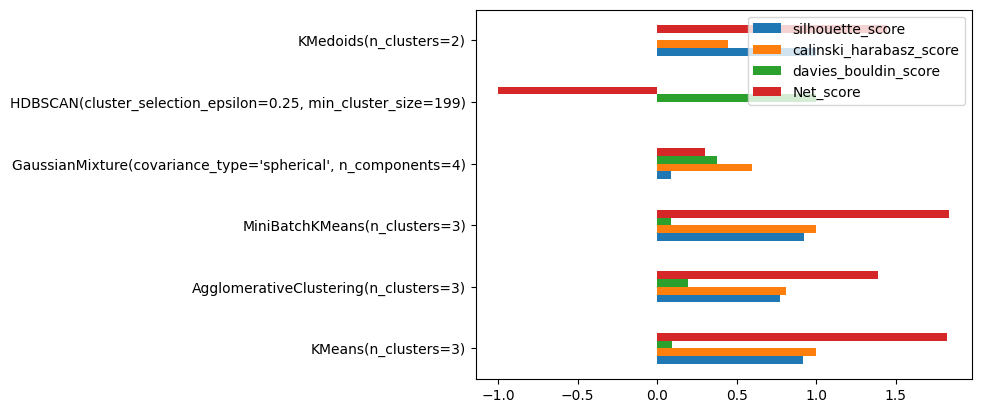

In [80]:
scaled_models_performance.plot(kind = 'barh')

## checking clusters from a business perspective

In [83]:
#customer count per each cluster
round(df['k_labels'].value_counts(normalize = True)*100 , 1)

1    58.1
0    26.5
2    15.3
Name: k_labels, dtype: float64

### 50% of customers are from the same cluster [1]

<Axes: ylabel='k_labels'>

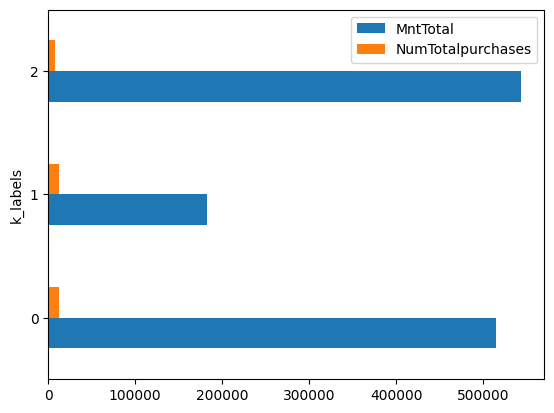

In [84]:
#defining the clusters contributions
df.groupby(['k_labels'])[['MntTotal' , 'NumTotalpurchases']].sum().plot(kind = 'barh')



In [85]:
px.histogram(
    data_frame=df,
    x = 'MntTotal',
    y = 'NumTotalpurchases',
    color = 'k_labels',
    labels = ['k_labels']
)


* cluster 1 with the lowest MntTotal and highest contribution of customer base 58% have the highest frequency in purchases, usually heavly affects fixed assets. In contrast, cluster 0 least frequency and top MntTotal (top profitable cluster yet the smallest in size of 15%)

Text(0.5, 0, 'k_labels')

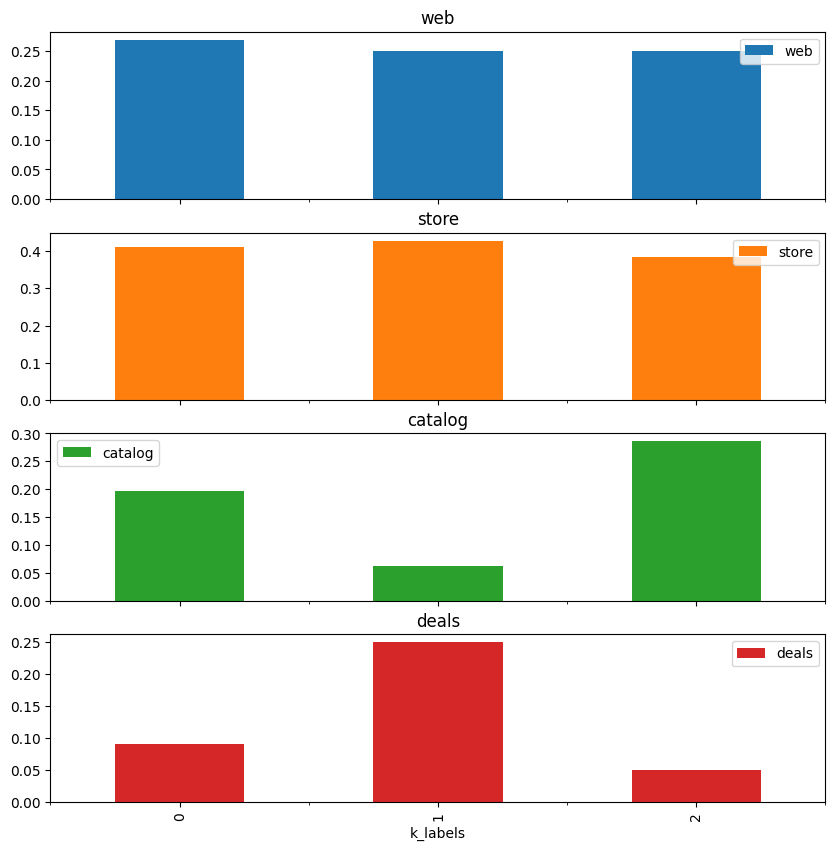

In [86]:
df.groupby(['k_labels'])[['web' , 'store' , 'catalog' , 'deals']].median().plot(kind = 'bar' , subplots=True , figsize = (10,10))
plt.xlabel('k_labels')


* cluster 1 with the previous feature is influenced only by deals and obviouly clear they are not buyers out of deals areas and not following the catalog in a paragmatic sense (waste of resources and waste of time)

In [87]:
fig2 = px.sunburst(
    df,
    path=['k_labels'  , 'marital_status' , 'education' ],
    color='Income'

)
fig2.update_traces(textinfo = 'label+percent parent')
fig2.show()

### Features visualization per segment in details

In [88]:
df.groupby(['k_labels']).mean().T.style.background_gradient(axis = 1)

k_labels,0,1,2
Income,66758.104452,38050.074161,77187.804734
Kidhome,0.116438,0.692428,0.056213
Teenhome,0.611301,0.534738,0.221893
Recency,48.529110,48.705699,51.053254
NumWebVisitsMonth,4.270548,6.309133,3.443787
Age,54.270548,49.577674,51.363905
Customer_Days,2521.583904,2494.244340,2568.180473
MntTotal,881.279110,142.829040,1607.266272
MntRegularProds,809.582192,117.448868,1539.926036
AcceptedCmpOverall,0.313356,0.109290,0.997041


### Recommended Features for further customer classification models

In [89]:
for i in clustering_df.columns:
  print(i)

education
Teenhome
marital_status
MntRegularProds
deals
NumTotalpurchases
MntTotal


<Axes: xlabel='k_labels', ylabel='RFM'>

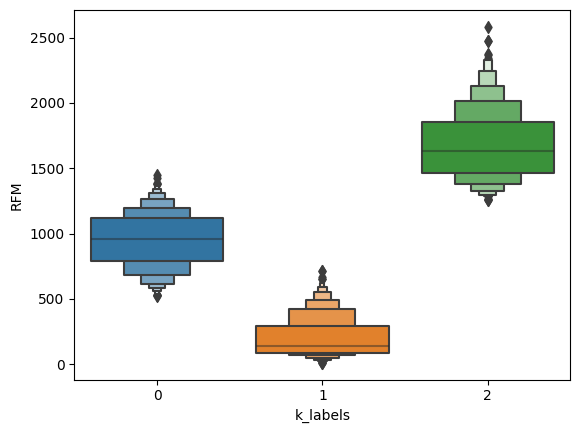

In [91]:
#RFM across the 3 Segments [0,1,2]
df['RFM'] = df['Recency'] + df['NumTotalpurchases'] + df['MntTotal']

sns.boxenplot(
    data = df,
    x= 'k_labels',
    y = 'RFM'
)

Note that the highest RFM is for the smallest population cluster 2 that represents only 15% of customers while cluster 1 represent 58%


### Segments further considerations in business context

* further business conclusions can be extracted from current clusters (which is beyond my current seeion objectives in establishing the clusters)

* For similar data set (it should be contrasted with (broader context) general population as per city or industry or country for good awarness of population features to identify uncovered segments and to relate to the extracted ones in size , demographics and other parameters).

* 1- Immidiate segment profits.
* 2- Sustainability.
* 3- Future potential.
* 4- Current size.
* 5- spending power